In [1]:
import pandas as pd

In [3]:
df = pd.read_csv('data/Fish.csv')
df.head()

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340


In [4]:
df['Species'].unique()

array(['Bream', 'Roach', 'Whitefish', 'Parkki', 'Perch', 'Pike', 'Smelt'],
      dtype=object)

In [6]:
bream_df = df[df['Species'] == 'Bream']

In [12]:
bream_df  #Length2, Weight 사용

bream_length = bream_df['Length2'].tolist()  #tolist() -> lsit로 강제 형변환
bream_weight = bream_df['Weight'].tolist()

#bream_length = 특성 attribute fiture

In [15]:
import matplotlib.pyplot as plt    #시각화/ 터미널에서 pip install matplotlib 먼저 선행

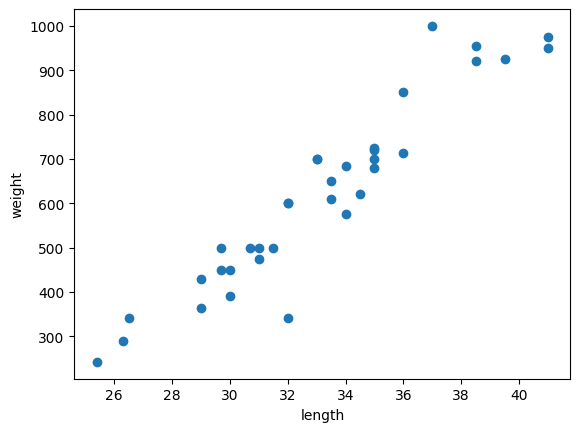

In [20]:
plt.scatter(bream_length, bream_weight)  # x축, y축에 들어갈 내용 ()에 넣어야함
                                         # scatter = 산점도

plt.xlabel('length')   # x축이 lenght 정보임을 그래프에 표시해주는 역할
plt.ylabel('weight')
plt.show()

In [24]:
smelt_df = df[df['Species'] == 'Smelt']
#smelt_df.head()

smelt_length = smelt_df['Length2'].tolist()
smelt_weight = smelt_df['Weight'].tolist()

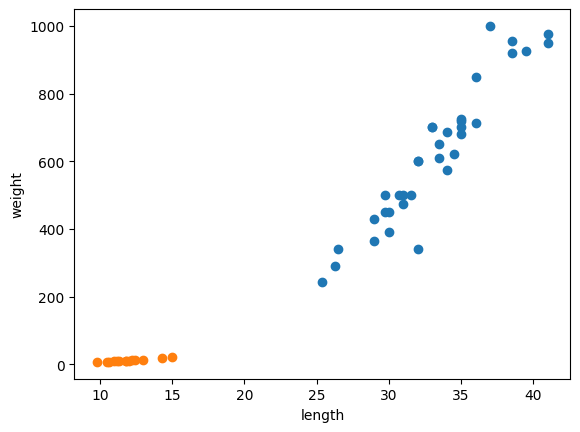

In [27]:
plt.scatter(bream_length, bream_weight)
plt.scatter(smelt_length, smelt_weight)

plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [28]:
# k-최근접 이웃 (k= 몇 개)

In [30]:
length = bream_length + smelt_length
weight = bream_weight + smelt_weight

In [35]:
fish_data = [[l, w] for l, w in zip(length, weight)]  #-> (,) tuple 데이터를 list로 만들어주는 것
#fish_data

In [43]:
target_data = [1] * len(bream_length) + [0] * len(smelt_length)

In [44]:
from sklearn.neighbors import KNeighborsClassifier  #KNeighborsClassifier - class

In [45]:
kn = KNeighborsClassifier()

In [49]:
kn.fit(fish_data, target_data)      #지도학습  /// targer_data = 정답지

KNeighborsClassifier()

In [48]:
#정답 확인

kn.score(fish_data, target_data)

#1.0 = 100점

1.0

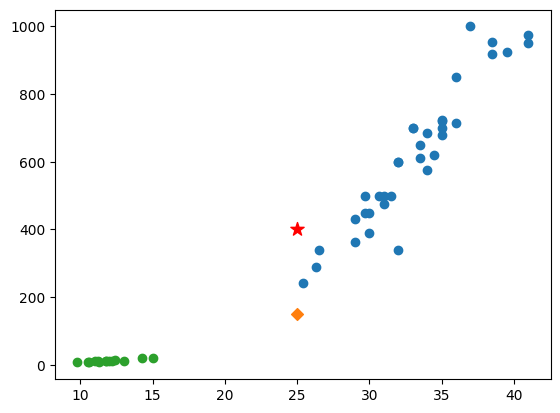

In [104]:
plt.scatter(bream_length, bream_weight)
plt.scatter(25, 400, c='#ff0000', s=100, marker='*')   #c = 색 변경/ s = size 변경 / marker = 모양 변경
plt.scatter(25, 150, marker='D')
plt.scatter(smelt_length, smelt_weight)
plt.show()

In [100]:
kn.predict([[25,400]])  #대괄호 왜 두 개?  -> 학습시킬 때 [[1,2], [1,3]...] 이런 식으로 학습시켰기 때문

array([1])

In [101]:
kn.predict([[16,30]])  #자기랑 제일 가까운 5개를 고르기 시작, 그것들의 평균값

array([0])

In [107]:
kn.predict([[25,150]]) #y축 200씩 커짐, x축 5씩 커짐 -> 눈에 보이는 거리와 다름 / 숫자만큼 거리가 얼마나 떨어져있는지 확인해야함

array([0])

In [91]:
kn._fit_X

array([[  25.4,  242. ],
       [  26.3,  290. ],
       [  26.5,  340. ],
       [  29. ,  363. ],
       [  29. ,  430. ],
       [  29.7,  450. ],
       [  29.7,  500. ],
       [  30. ,  390. ],
       [  30. ,  450. ],
       [  30.7,  500. ],
       [  31. ,  475. ],
       [  31. ,  500. ],
       [  31.5,  500. ],
       [  32. ,  340. ],
       [  32. ,  600. ],
       [  32. ,  600. ],
       [  33. ,  700. ],
       [  33. ,  700. ],
       [  33.5,  610. ],
       [  33.5,  650. ],
       [  34. ,  575. ],
       [  34. ,  685. ],
       [  34.5,  620. ],
       [  35. ,  680. ],
       [  35. ,  700. ],
       [  35. ,  725. ],
       [  35. ,  720. ],
       [  36. ,  714. ],
       [  36. ,  850. ],
       [  37. , 1000. ],
       [  38.5,  920. ],
       [  38.5,  955. ],
       [  39.5,  925. ],
       [  41. ,  975. ],
       [  41. ,  950. ],
       [   9.8,    6.7],
       [  10.5,    7.5],
       [  10.6,    7. ],
       [  11. ,    9.7],
       [  11.2,    9.8],


In [92]:
kn._y  #정답지 호출

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0])

In [93]:
#모든 생선 다 참고하는 알고리즘

kn49 = KNeighborsClassifier(49)

In [94]:
kn49.fit(fish_data, target_data)

KNeighborsClassifier(n_neighbors=49)

In [95]:
kn49.score(fish_data, target_data)

0.7142857142857143

In [96]:
35/49

0.7142857142857143

In [97]:
#모든 데이터와 비교하면 다수결에 따라 무조건 많은 개수의 답을 외침 - ex)도미

In [98]:
kn = KNeighborsClassifier()   #KNeighborsClassifier() -> n_neighbors 기본값 5 (5개 비교)
kn.fit(fish_data, target_data)

for n in range(5, 50):
    kn.n_neighbors = n

    score = kn.score(fish_data, target_data)
    print(n, score)
    if score < 1:
        break

5 1.0
6 1.0
7 1.0
8 1.0
9 1.0
10 1.0
11 1.0
12 1.0
13 1.0
14 1.0
15 1.0
16 1.0
17 1.0
18 0.9795918367346939


In [193]:
import seaborn as sns

df = sns.load_dataset('iris')
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [194]:
df.tail()

,sepal_length,sepal_width,petal_length,petal_width,species
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica
149,5.9,3.0,5.1,1.8,virginica


In [195]:
cond = df['species'] == 'versicolor'
df[cond].head()

,sepal_length,sepal_width,petal_length,petal_width,species
50,7.0,3.2,4.7,1.4,versicolor
51,6.4,3.2,4.5,1.5,versicolor
52,6.9,3.1,4.9,1.5,versicolor
53,5.5,2.3,4.0,1.3,versicolor
54,6.5,2.8,4.6,1.5,versicolor


In [196]:
df['species'].unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [285]:
df.groupby('species').mean()

,sepal_length,sepal_width,petal_length,petal_width
species,,,,
setosa,5.006,3.428,1.462,0.246
versicolor,5.936,2.770,4.260,1.326
virginica,6.588,2.974,5.552,2.026


1. 데이터 가져오기
2. 어떤 특성을 사용할지
3. KN 학습
4. matplotlib 시각화
5. 예측

In [272]:
setosa_df = df[df['species'] == 'setosa']
virginica_df = df[df['species'] == 'virginica']
versicolor_df = df[df['species'] == 'versicolor']

In [273]:
#petal_length	petal_width 특성 사용(가장 차이가 심함)

In [279]:
setosa_length = setosa_df['petal_length'].tolist()
setosa_width = setosa_df['petal_width'].tolist()

In [280]:
virginica_length = virginica_df['petal_length'].tolist()  
virginica_width = virginica_df['petal_width'].tolist()

In [281]:
versicolor_length = versicolor_df['petal_length'].tolist()  
versicolor_width = versicolor_df['petal_width'].tolist()

In [282]:
import matplotlib.pyplot as plt

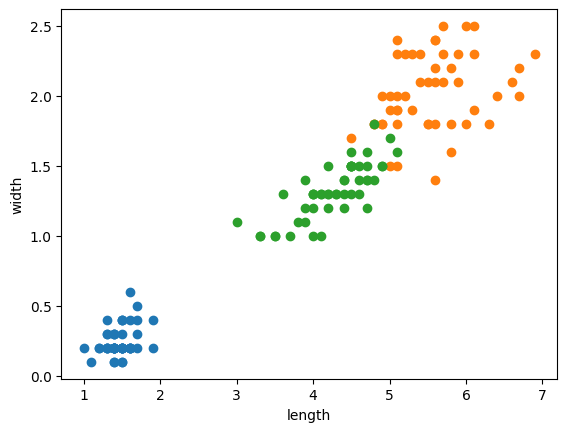

In [283]:
plt.scatter(setosa_length, setosa_width)
plt.scatter(virginica_length, virginica_width)
plt.scatter(versicolor_length, versicolor_width)

plt.xlabel('length')
plt.ylabel('width')
plt.show()

In [284]:
length = setosa_length + virginica_length
width = setosa_width + virginica_width

In [260]:
flower_data = [[l, w] for l, w in zip(length, width)]

In [261]:
target_data = [1] * len(setosa_length) + [0] * len(virginica_length)

In [262]:
from sklearn.neighbors import KNeighborsClassifier

In [263]:
kn = KNeighborsClassifier()

In [264]:
kn.fit(flower_data, target_data)

KNeighborsClassifier()

In [265]:
kn.score(flower_data, target_data)

1.0

In [266]:
kn.predict([[4, 1]])

array([0])

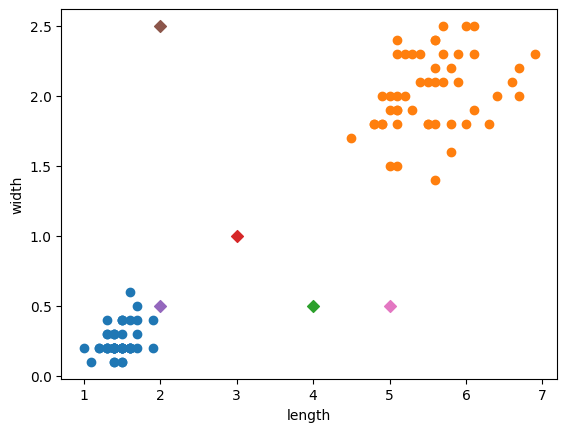

In [267]:
plt.scatter(setosa_length, setosa_width)
plt.scatter(virginica_length, virginica_width)

plt.scatter(4, 0.5, marker='D')
plt.scatter(3, 1, marker='D')
plt.scatter(2, 0.5, marker='D')
plt.scatter(2, 2.5, marker='D')
plt.scatter(5, 0.5, marker='D')

plt.xlabel('length')
plt.ylabel('width')
plt.show()

In [268]:
kn.predict([[4, 0.5]])

array([0])

In [269]:
kn.predict([[3, 1]])

array([1])

In [270]:
kn.predict([[2, 0.5]])

array([1])

In [271]:
kn.predict([[5, 0.5]])

array([0])

In [247]:
kn.predict([[2, 2.5]])

array([1])